In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

In [2]:
#read the saved data:
music_df=pd.read_csv("../Resources/all_data_genre.csv", encoding = "Latin-1")
music_df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...   mode  \
0                147  141381703                  43  ...  Major   
1                 48  133716286                  48  ...  Major   
2                113  140003974                  94  ...  Major   
3                100  800840817                 116  ...  Major   
4                 50  303236322                  84  ...  Minor   

  danceability_%  valence_% energy_%  acousticness_% instrumentalness_%  \
0             80         89       83              31                  0   
1             71         61       74               7                  0   
2             51         32       53              17                  0   
3             55         58       72              11                  0   
4             65         23       80              14                 63   

  liveness_%  speechiness_%  Deezer Album ID  Deezer Genre  
0          8              4        463574485   Asian Music  
1         10              4        410083687   Rap/Hip Hop  
2         31              6        484372295           Pop  
3         11             15        108447472           Pop  
4         11              6        442984025   Latin Music  

[5 rows x 26 columns]

In [3]:
#make "Streams" an integer
music_df['streams'] = pd.to_numeric(music_df['streams'], errors='coerce')
music_df.head(3)

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   

   in_spotify_charts      streams  in_apple_playlists  ...   mode  \
0                147  141381703.0                  43  ...  Major   
1                 48  133716286.0                  48  ...  Major   
2                113  140003974.0                  94  ...  Major   

  danceability_%  valence_% energy_%  acousticness_% instrumentalness_%  \
0             80         89       83              31                  0   
1             71         61       74               7                  0   
2             51         32       53              17                  0   

  liveness_%  speechiness_%  Deezer Album ID  Deezer Genre  
0          8              4        463574485   Asian Music  
1         10              4        410083687   Rap/Hip Hop  
2         31              6        484372295           Pop  

[3 rows x 26 columns]

In [4]:
#songs from 23
music_23_df = music_df[music_df['released_year'] == 2023]
music_23_df = music_23_df.sort_values(by="streams", ascending=False)
music_23_df.head()

track_name              artist(s)_name  \
6                          Ella Baila Sola  Eslabon Armado, Peso Pluma   
117  Shakira: Bzrp Music Sessions, Vol. 53           Shakira, Bizarrap   
30                                     TQG            Karol G, Shakira   
9                          La Bebe - Remix       Peso Pluma, Yng Lvcas   
42                     Die For You - Remix   Ariana Grande, The Weeknd   

     artist_count  released_year  released_month  released_day  \
6               2           2023               3            16   
117             2           2023               1            11   
30              2           2023               2            23   
9               2           2023               3            17   
42              2           2023               2            24   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
6                    3090                 50  725980112.0                  34   
117                  5724                 44  721975598.0                 119   
30                   4284                 49  618990393.0                 115   
9                    2953                 44  553634067.0                  49   
42                   3408                 47  518745108.0                  87   

     ...   mode danceability_%  valence_% energy_%  acousticness_%  \
6    ...  Minor             67         83       76              48   
117  ...  Minor             78         50       63              27   
30   ...  Minor             72         61       63              67   
9    ...  Minor             81         56       48              21   
42   ...  Minor             53         50       53              23   

    instrumentalness_% liveness_%  speechiness_%  Deezer Album ID  \
6                    0          8              3        418111007   
117                  0          9              5        395194257   
30                   0          9             28        408659277   
9                    0          8             33        382919757   
42                   0         44              7         14652356   

             Deezer Genre  
6    Traditional Mexicano  
117           Latin Music  
30            Rap/Hip Hop  
9             Rap/Hip Hop  
42                    R&B  

[5 rows x 26 columns]

In [5]:
#songs from 22
music_22_df = music_df[music_df['released_year'] == 2022]
music_22_df = music_22_df.sort_values(by="streams", ascending=False)
music_22_df.head(3)

track_name               artist(s)_name  \
73                         Me Porto Bonito  Chencho Corleone, Bad Bunny   
61   Quevedo: Bzrp Music Sessions, Vol. 52            Bizarrap, Quevedo   
161                      Titi Me Preguntï¿                    Bad Bunny   

     artist_count  released_year  released_month  released_day  \
73              2           2022               5             6   
61              2           2022               7             6   
161             1           2022               5             6   

     in_spotify_playlists  in_spotify_charts       streams  \
73                   8870                 43  1.440758e+09   
61                   8506                 45  1.356565e+09   
161                  9037                 42  1.264311e+09   

     in_apple_playlists  ...   mode danceability_%  valence_% energy_%  \
73                  104  ...  Minor             91         43       71   
61                   94  ...  Major             62         55       78   
161                 124  ...  Minor             65         19       72   

     acousticness_% instrumentalness_% liveness_%  speechiness_%  \
73                9                  0          9              8   
61                1                  3         23              4   
161              10                  0         13             25   

     Deezer Album ID  Deezer Genre  
73         316164367   Latin Music  
61         332352037   Rap/Hip Hop  
161        316164367   Latin Music  

[3 rows x 26 columns]

In [6]:
#all songs from before 2022:
music_prior_df = music_df[music_df['released_year'] < 2022]
music_prior_df = music_prior_df.sort_values(by="streams", ascending=False)
music_prior_df = music_prior_df.loc[music_prior_df["track_name"]!= "Love Grows (Where My Rosemary Goes)"]
music_prior_df.head(3)

track_name         artist(s)_name  \
151                                   Shape of You             Ed Sheeran   
36   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   
137                                      One Dance    Drake, WizKid, Kyla   

     artist_count  released_year  released_month  released_day  \
151             1           2017               1             6   
36              2           2018              10             9   
137             3           2016               4             4   

     in_spotify_playlists  in_spotify_charts       streams  \
151                 32181                 10  3.562544e+09   
36                  24094                 78  2.808097e+09   
137                 43257                 24  2.713922e+09   

     in_apple_playlists  ...   mode danceability_%  valence_% energy_%  \
151                  33  ...  Minor             83         93       65   
36                  372  ...  Major             76         91       50   
137                 433  ...  Major             77         36       63   

     acousticness_% instrumentalness_% liveness_%  speechiness_%  \
151              58                  0          9              8   
36               54                  0          7              5   
137               1                  0         36              5   

     Deezer Album ID  Deezer Genre  
151         14996073           Pop  
36         110040592   Rap/Hip Hop  
137         13082992   Rap/Hip Hop  

[3 rows x 26 columns]

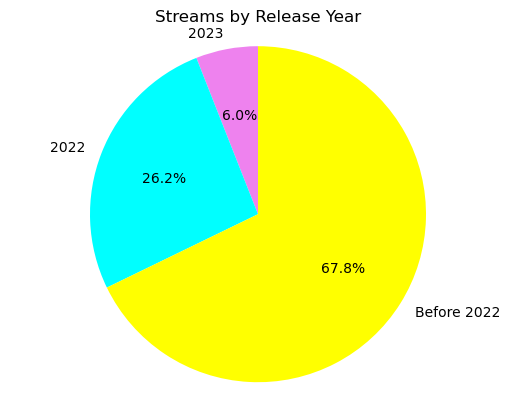

In [7]:
#pie chart of most popular songs in 2023 by release year:
popular23 = music_23_df["streams"].sum()
popular22 = music_22_df["streams"].sum()
popularprior = music_prior_df["streams"].sum()

#pie chart:
years = ["2023", "2022", "Before 2022"]
popular_music = [popular23, popular22, popularprior]
colors = ["violet", "cyan", "yellow"]

plt.title("Streams by Release Year")
plt.pie(popular_music, labels=years, colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.savefig("../Output/Streams by Release Year.png")
plt.show()

In [8]:
#anova test for streams by year:
anova_result = stats.f_oneway(music_23_df["streams"],
                               music_22_df["streams"],
                               music_prior_df["streams"])
alpha = 0.05
if anova_result.pvalue <= alpha:
    print("There is a significant difference in streaming (aka popularity) between release years.")
else:
    print("There is no significant difference in streaming (aka popularity) between release years.")

# Print the ANOVA F-statistic and p-value
print("ANOVA F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)


There is a significant difference in streaming (aka popularity) between release years.
ANOVA F-statistic: 217.7710701815086
P-value: 1.83613206144644e-76


            Deezer Genre  2023 streams
11           Rap/Hip Hop  5.300884e+09
1            Asian Music  3.331022e+09
9                    Pop  2.875129e+09
8            Latin Music  2.108739e+09
13  Traditional Mexicano  1.693726e+09
3                Country  9.115957e+08
10                   R&B  9.048627e+08
2        Brazilian Music  6.831887e+08
4                 Cumbia  5.056714e+08
5                  Dance  4.575794e+08
12             Reggaeton  4.308060e+08
0            Alternative  3.123859e+08
6                Electro  1.435738e+08
7                   Kids  1.231328e+08


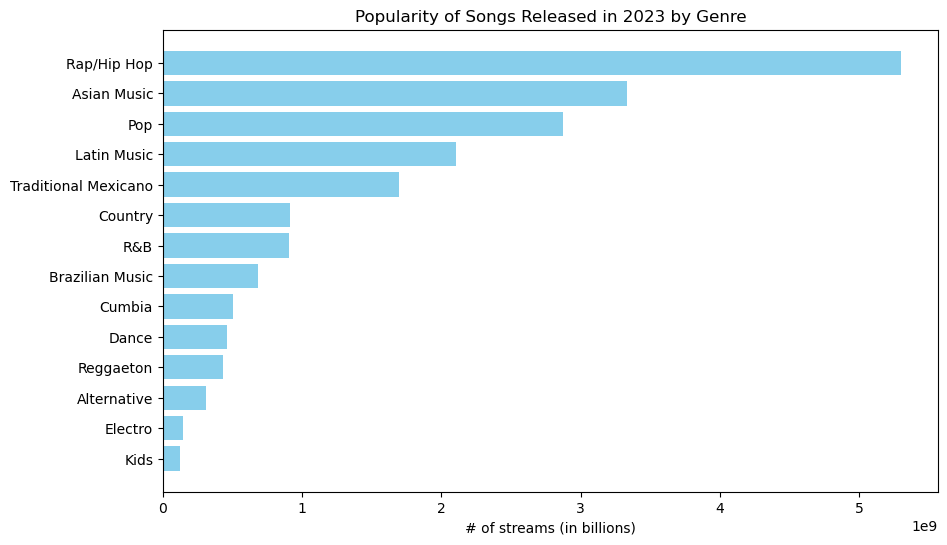

In [9]:
#plot 2023 songs by genre & streams:
genrepopular23_df = music_23_df[["Deezer Genre", "streams"]]
genrepopular23_df = genrepopular23_df.dropna(how='any')
groupedgenre23 = genrepopular23_df.groupby("Deezer Genre", as_index=False).sum()
groupedgenre23 = groupedgenre23.sort_values("streams", ascending=False)
groupedgenre23 = groupedgenre23.rename(columns={"streams": "2023 streams"})
print(groupedgenre23)

plt.figure(figsize=(10, 6))
plt.barh(groupedgenre23['Deezer Genre'], groupedgenre23['2023 streams'], color='skyblue')
plt.xlabel('# of streams (in billions)')
plt.title('Popularity of Songs Released in 2023 by Genre')
# Invert y-axis for better readability
plt.gca().invert_yaxis()  
plt.savefig("../Output/Popularity of Songs Released in 2023 by Genre.png")
plt.show()

            Deezer Genre  2022 streams
11                   Pop  2.735264e+10
13           Rap/Hip Hop  1.971394e+10
10           Latin Music  1.329452e+10
1            Alternative  4.955050e+09
7                  Dance  4.399960e+09
12                   R&B  4.371426e+09
2            Asian Music  4.312783e+09
14             Reggaeton  2.663520e+09
18  Traditional Mexicano  1.716406e+09
4        Brazilian Music  1.236861e+09
8                Electro  1.229864e+09
6                Country  1.169207e+09
15                  Rock  6.624728e+08
9            Films/Games  6.022286e+08
0          African Music  5.956107e+08
3          Banda/Grupero  3.197571e+08
16   Singer & Songwriter  2.847858e+08
17           Soul & Funk  2.440767e+08
5              Classical  2.091064e+08


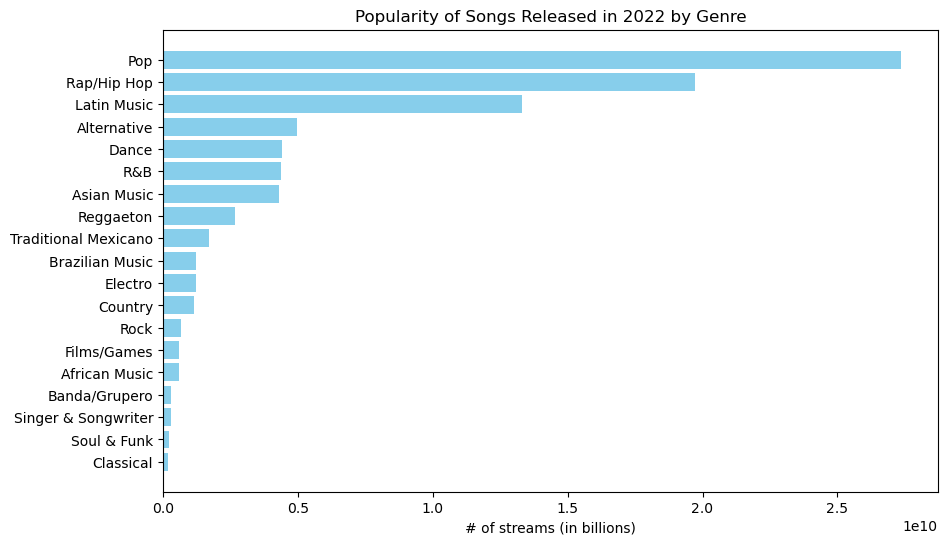

In [10]:
#plot 2022 songs by genre & streams:
genrepopular22_df = music_22_df[["Deezer Genre", "streams"]]
genrepopular22_df = genrepopular22_df.dropna(how='any')
genrepopular22_df
groupedgenre22 = genrepopular22_df.groupby("Deezer Genre", as_index=False).sum()
groupedgenre22 = groupedgenre22.sort_values("streams", ascending=False)
groupedgenre22 = groupedgenre22.rename(columns={"streams": "2022 streams"})
#groupedgenre22 = groupedgenre22.set_index("Deezer Genre")
print(groupedgenre22)

plt.figure(figsize=(10, 6))
plt.barh(groupedgenre22['Deezer Genre'], groupedgenre22['2022 streams'], color='skyblue')
plt.xlabel('# of streams (in billions)')
plt.title('Popularity of Songs Released in 2022 by Genre')
# Invert y-axis for better readability
plt.gca().invert_yaxis()  
plt.savefig("../Output/Popularity of Songs Released in 2022 by Genre.png")
plt.show()

           Deezer Genre  <2022 streams
13                  Pop   8.874217e+10
15          Rap/Hip Hop   3.794450e+10
1           Alternative   3.637354e+10
18                 Rock   1.796494e+10
14                  R&B   1.547817e+10
6                 Dance   8.530990e+09
7               Electro   8.004041e+09
17            Reggaeton   5.753932e+09
8           Films/Games   4.798387e+09
2           Asian Music   3.421334e+09
19  Singer & Songwriter   2.957269e+09
4             Classical   2.875754e+09
11          Latin Music   2.565355e+09
16               Reggae   9.568653e+08
0         African Music   8.093069e+08
5               Country   6.216610e+08
3             Christian   5.782079e+08
12                Metal   3.870802e+08
9                  Folk   2.448919e+08
10         Indian Music   1.832732e+08


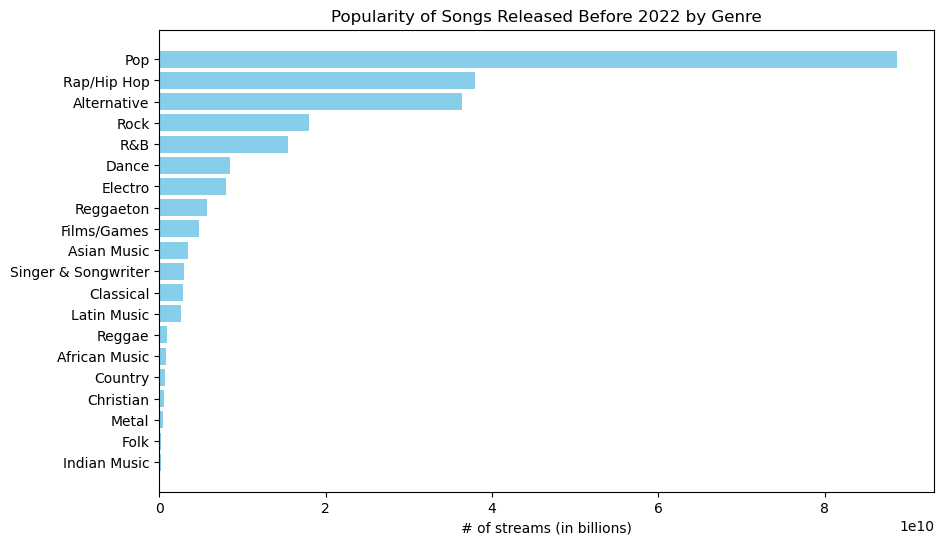

In [11]:
#plot <2022 songs by genre & streams:
genrepopularprior_df = music_prior_df[["Deezer Genre", "streams"]]
genrepopularprior_df = genrepopularprior_df.dropna(how='any')
groupedgenreprior = genrepopularprior_df.groupby("Deezer Genre", as_index=False).sum()
groupedgenreprior = groupedgenreprior.sort_values("streams", ascending=False)
groupedgenreprior = groupedgenreprior.rename(columns={"streams": "<2022 streams"})
#groupedgenreprior = groupedgenreprior.set_index("Deezer Genre")
print(groupedgenreprior)

plt.figure(figsize=(10, 6))
plt.barh(groupedgenreprior['Deezer Genre'], groupedgenreprior['<2022 streams'], color='skyblue')
plt.xlabel('# of streams (in billions)')
plt.title('Popularity of Songs Released Before 2022 by Genre')
# Invert y-axis for better readability
plt.gca().invert_yaxis()  
plt.savefig("../Output/Popularity of Songs Released Before 2022 by Genre.png")
plt.show()

In [12]:
anova_result = stats.f_oneway(groupedgenre23['2023 streams'],
                               groupedgenre22['2022 streams'],
                               groupedgenreprior['<2022 streams'])
alpha = 0.05
if anova_result.pvalue <= alpha:
    print("There is a significant difference in streaming (aka popularity) among genres in at least one of the years.")
else:
    print("There is no significant difference in streaming (aka popularity) scores among genres in any of the years.")

# Print the ANOVA F-statistic and p-value
print("ANOVA F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)


There is no significant difference in streaming (aka popularity) scores among genres in any of the years.
ANOVA F-statistic: 2.657599566964205
P-value: 0.0800088639337745


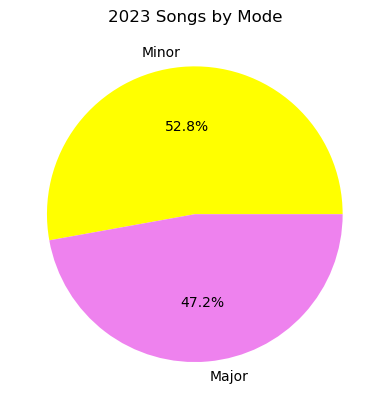

In [13]:
#plot 2023 songs by key:  key is a way musicians define the mood or emotional quality of a piece of music.
key23 = music_23_df["mode"].value_counts()
key23

plt.pie(key23, autopct='%1.1f%%', labels=key23.index, colors=['yellow','violet'])
plt.title('2023 Songs by Mode')

plt.savefig("../Output/Songs from 2023 by Mode.png")
plt.show()

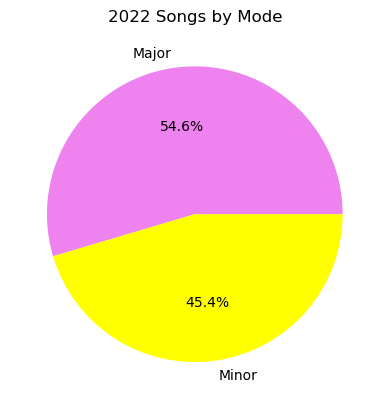

In [14]:
#plot 2022 songs by Key:  Key is a way musicians define the mood or emotional quality of a piece of music.
key22 = music_22_df["mode"].value_counts()
key22

plt.pie(key22, autopct='%1.1f%%', labels=key22.index, colors=['violet','yellow'])
plt.title('2022 Songs by Mode')

plt.savefig("../Output/Songs from 2022 by Mode.png")
plt.show()

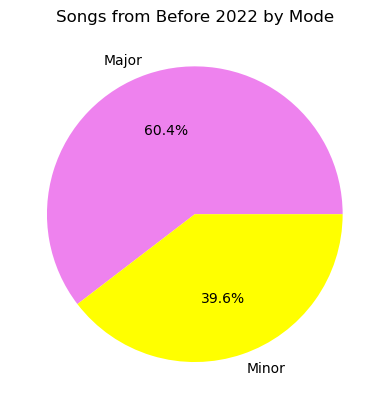

In [15]:
#plot songs before 2022 by Key:  Key is a way musicians define the mood or emotional quality of a piece of music.
keyprior = music_prior_df["mode"].value_counts()
keyprior

plt.pie(keyprior, autopct='%1.1f%%', labels=keyprior.index, colors=['violet', 'yellow'])
plt.title('Songs from Before 2022 by Mode')

plt.savefig("../Output/Songs from Before 2022 by Mode.png")
plt.show()

In [16]:
#chi test on all modes grouped by year
key23 = music_23_df["mode"].value_counts()
print(key23)
key22 = music_22_df["mode"].value_counts()
print(key22)
keyprior = music_prior_df["mode"].value_counts()
print(keyprior)
key_df = [[75, 84],[196, 163], [180, 118]]
chi2_stat, p_value, _, _ = stats.chi2_contingency(key_df)
alpha = 0.05
if p_value <= alpha:
    print("There is a significant association between key and year.")
else:
    print("There is no significant association between key and year.")

# Print the chi-squared statistic and p-value
print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_value)

Minor    84
Major    75
Name: mode, dtype: int64
Major    196
Minor    163
Name: mode, dtype: int64
Major    180
Minor    118
Name: mode, dtype: int64
There is a significant association between key and year.
Chi-squared Statistic: 7.461340403707916
P-value: 0.02397676118088346


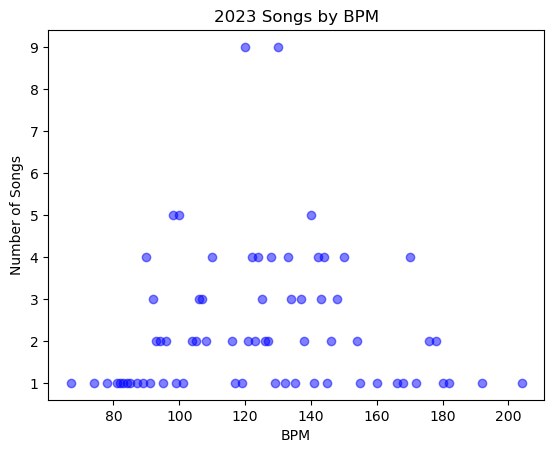

In [17]:
#plot 2023 songs by bpm: Scatter Plot
bpm23 = music_23_df["bpm"].value_counts()
bpm23

plt.scatter(bpm23.index, bpm23, marker='o', color='blue', alpha=0.5)
plt.title('2023 Songs by BPM')
plt.xlabel('BPM')
plt.ylabel('Number of Songs')

plt.savefig("../Output/Songs from 2023 by BPM.png")
plt.show()

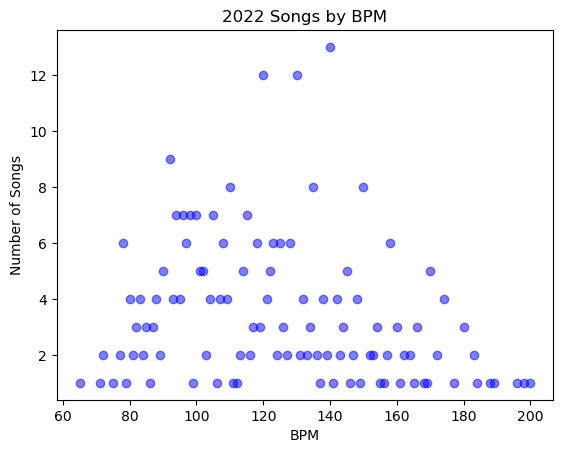

In [18]:
#plot 2022 songs by bpm: Scatter Plot
bpm22 = music_22_df["bpm"].value_counts()
bpm22

plt.scatter(bpm22.index, bpm22, marker='o', color='blue', alpha=0.5)
plt.title('2022 Songs by BPM')
plt.xlabel('BPM')
plt.ylabel('Number of Songs')

plt.savefig("../Output/Songs from 2022 by BPM.png")
plt.show()

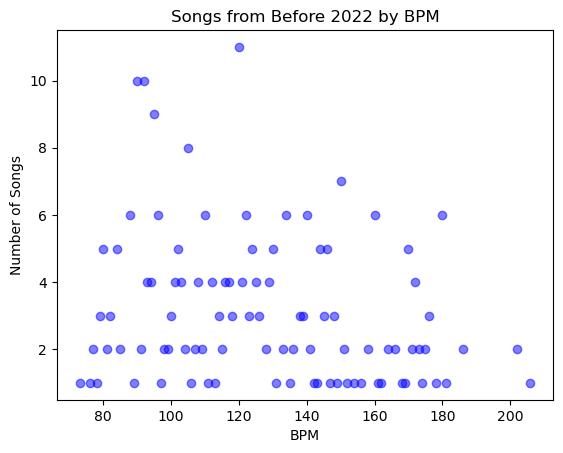

In [19]:
#plot 2023 songs by bpm: box Plot
bpm_prior = music_prior_df["bpm"].value_counts()
bpm_prior

plt.scatter(bpm_prior.index, bpm_prior, marker='o', color='blue', alpha=0.5)
plt.title('Songs from Before 2022 by BPM')
plt.xlabel('BPM')
plt.ylabel('Number of Songs')

plt.savefig("../Output/Songs from Before 2022 by BPM.png")
plt.show()

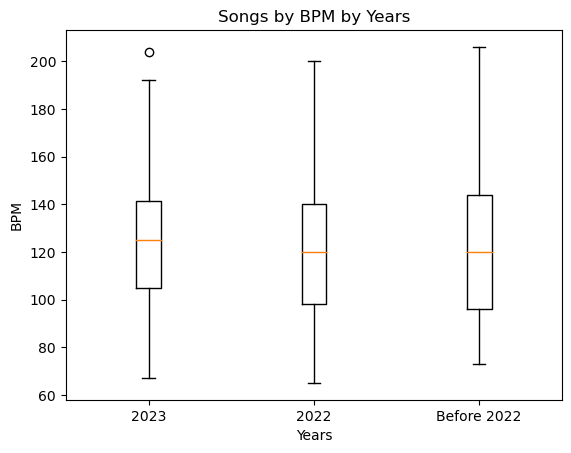

In [20]:
#plot 2023 songs by bpm: box Plot
bpm23 = music_23_df["bpm"]
bpm22 = music_22_df["bpm"]
bpm_prior = music_prior_df["bpm"]

fig, ax = plt.subplots()
boxplot23 = ax.boxplot(bpm23, positions=[1], labels=[2023])
boxplot22 = ax.boxplot(bpm22, positions=[2], labels=[2022])
boxplotprior = ax.boxplot(bpm_prior, positions=[3], labels=['Before 2022'])
ax.set_xlabel("Years")
ax.set_ylabel('BPM')
ax.set_title("Songs by BPM by Years")
plt.savefig("../Output/Songs by BPM by Years.png")
plt.show()

In [21]:
#pvalue of BPM in 23 v 22 tracks:

bpm23 = music_23_df["bpm"]
bpm22 = music_22_df["bpm"]
bpm_prior = music_prior_df["bpm"]
bpm_all = music_df["bpm"]

p_value = stats.ttest_ind(bpm23, bpm22)
print("P-value", p_value)

P-value Ttest_indResult(statistic=1.3468456886572902, pvalue=0.1786211619365968)


In [22]:
#pvalue of BPM in 23 v prior tracks:

bpm23 = music_23_df["bpm"]
bpm22 = music_22_df["bpm"]
bpm_prior = music_prior_df["bpm"]
bpm_all = music_df["bpm"]

p_value = stats.ttest_ind(bpm23, bpm_prior)
print("P-value", p_value)

P-value Ttest_indResult(statistic=0.8368221824968212, pvalue=0.403131814959101)


In [23]:
#pvalue of BPM in 23 v 22 tracks::

bpm23 = music_23_df["bpm"]
bpm22 = music_22_df["bpm"]
bpm_prior = music_prior_df["bpm"]
bpm_all = music_df["bpm"]

p_value = stats.ttest_ind(bpm22, bpm_prior)
print("P-value", p_value)

P-value Ttest_indResult(statistic=-0.5121876196274204, pvalue=0.6086923596013655)


In [24]:
#merge dataframes
genre_streamed_merged = pd.merge(groupedgenre23, groupedgenre22, on="Deezer Genre", how="right")
genre_streamed_merged = pd.merge(genre_streamed_merged, groupedgenreprior, on="Deezer Genre", how="right")
#genre_streamed_merged.fillna(0, inplace=True)
genre_streamed_merged = genre_streamed_merged.dropna(how='any')
#genre_streamed_merged = genre_streamed_merged.set_index("Deezer Genre")
genre_streamed_merged

Deezer Genre  2023 streams  2022 streams  <2022 streams
0           Pop  2.875129e+09  2.735264e+10   8.874217e+10
1   Rap/Hip Hop  5.300884e+09  1.971394e+10   3.794450e+10
2   Alternative  3.123859e+08  4.955050e+09   3.637354e+10
4           R&B  9.048627e+08  4.371426e+09   1.547817e+10
5         Dance  4.575794e+08  4.399960e+09   8.530990e+09
6       Electro  1.435738e+08  1.229864e+09   8.004041e+09
7     Reggaeton  4.308060e+08  2.663520e+09   5.753932e+09
9   Asian Music  3.331022e+09  4.312783e+09   3.421334e+09
12  Latin Music  2.108739e+09  1.329452e+10   2.565355e+09
15      Country  9.115957e+08  1.169207e+09   6.216610e+08